<h2>A 1-D potential energy surface</h2>

We consider the following potential energy surface, as used by Stelzl et al. (JCTC 2017): 

$U(x) = -\frac{2k_BT}{0.596} \ln [ e^{−2(x−2)^2-2} + e^{−2(x−5)^2} ] $

where $x \in [1.5,5.5]$. 

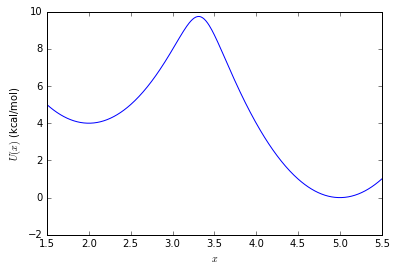

In [7]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from twostate import *

dx = 0.01
xmin, xmax = 1.5, 5.5
x = np.arange(xmin, xmax+dx, dx)

plt.figure()
plt.plot(x,U(x))
plt.xlabel('$x$')
plt.ylabel('$U(x)$ (kcal/mol)')
plt.xlim(xmin, xmax)
plt.show()



In [8]:
from pyemma.msm.estimators import OOMReweightedMSM
from pyemma.msm import estimate_markov_model
from pyemma.msm.estimators._OOM_MSM import *
import numpy as np
import time
import os,sys


def OOM_corrected_tProb(dtrajs, tau):
    """Estimate MSMs and timescales using the OOM method of Nuske et al JCP 2017
    
    INPUT
    
    dtrajs       a set of discrete state index trajectories
    tau          the lag time in traj frames"""
    
    msmrev = OOMReweightedMSM(lag=tau, reversible=True, count_mode='sliding',
                           sparse=False, connectivity='largest', dt_traj='100 step',
                           nbs=10000, rank_Ct='bootstrap_counts', tol_rank=10.0,
                           score_method='VAMP2', score_k=10, mincount_connectivity='1/n')
        
    msmrev_fit=msmrev.fit(dtrajs)

    Tt_Eq, lcc_new = compute_corrected_tProb(msmrev_fit)
    
    from pyemma.msm import markov_model
    msm_rev = markov_model(Tt_Eq)

    #np.save('implied_timescales_corrected.npy',msm_rev.timescales()[0:5]) #save top 5 timescales-corrected
    #np.save('stationary_population_corrected.npy',msm_rev.stationary_distribution) #save equilibrium populations-corrected

    print 'implied_timescales_corrected:', msm_rev.timescales()[0:5] 
    print 'stationary_population_corrected', msm_rev.stationary_distribution
    
    print 'Corrected implied timescales', msm_rev.timescales()[0:5] ##print top 5 timescales-corrected
    print 'Corrected population', msm_rev.stationary_distribution ##print equilibrium populations-corrected

    return Tt_Eq

    #print 'oom.OOM_omega', msmrev_fit.OOM_omega
    #print 'oom.OOM_rank', msmrev_fit.OOM_rank
    #print 'oom.OOM_sigma', msmrev_fit.OOM_sigma



def compute_corrected_tProb(msmrev_fit):
    """Compute MSM quantities using the OOM method of Nuske et al.
    INPUTS

        Xi : ndarray(M, N, M)
                matrix of set-observable operators
        omega: ndarray(M,)
                information state vector of OOM
        sigma : ndarray(M,)
                evaluator of OOM

    OUTPUTS

        Tt_Eq : ndarray(N, N)
                equilibrium transition matrix
        lcc : ndarray(M,)
                the largest connected set of the transition matrix.
    """
    
    # Compute OOM-components:
    Xi=msmrev_fit.OOM_components
    omega=msmrev_fit.OOM_omega
    sigma=msmrev_fit.OOM_sigma

    Tt_Eq, lcc_new = equilibrium_transition_matrix(Xi, omega, sigma, reversible=True, return_lcc=True)
    
    return Tt_Eq, lcc_new



def dtrajs2counts(dtrajs):
    """Convert dtrajs to a count matrix."""
    
    # convert assigns to counts
    counts = np.zeros( (bins.nbins, bins.nbins) )
    for a in range(len(dtrajs)):
        assignment = dtrajs[a]
        for j in range(len(assignment)-1):
            counts[assignment[j],assignment[j+1]] += 1

    return counts


resultsheader # shape (ntrials, len(nreplicas), len(trajlengths)): ntrials = 20, nreplicas = [15, 25, 40, 75, 100, 150, 200, 300, 500, 750, 1000], trajlengths = [10, 100, 1000]

***** TRAJLENGTH 10 *****
-- trial 0 nshoot 15 --
adaptive seeding of bin 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
implied_timescale_corrected 132.889786725
pi_corrected [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   6.16985430e-05
   3.48816660e-04   2.71938373e-03   1.84856714e-02   1.20055214e-01
   2.29925752e-01   2.91481311e-01   2.37103789e-01   9.98183638e-02]
delF_corrected inf kcal/mol.
f_corrected [        inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf  5.04244063
  4.00999809  2.78604408  1.64375606  0.52866638  0.14138279  0.
  0.12306084  0.63868774]
implied_timescale_O

/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:127: RuntimeWarning: divide by zero encountered in log
/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:129: RuntimeWarning: divide by zero encountered in log
/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:232: RuntimeWarning: divide by zero encountered in log


 58588523.256 steps. delta_f_weighted 5.2937499478 kcal/mol.
pi_rownorm [  7.15872343e-13+0.j   1.50555868e-12+0.j   1.60781172e-12+0.j
   1.46126303e-12+0.j   4.47156731e-13+0.j   1.63831231e-13+0.j
   2.84772823e-14+0.j   7.77375155e-16+0.j   0.00000000e+00+0.j
   0.00000000e+00+0.j   4.94917841e-17+0.j   1.21001958e-04+0.j
   4.94171570e-04+0.j   5.06317875e-03+0.j   2.77071397e-02+0.j
   1.18656147e-01+0.j   2.21709773e-01+0.j   2.62708059e-01+0.j
   2.50935172e-01+0.j   1.12605357e-01+0.j]
implied_timescale_rownorm 13015767.426 steps. delta_f_rownorm 15.4071189414 kcal/mol.
-- trial 1 nshoot 15 --
adaptive seeding of bin 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:232: RuntimeWarning: invalid value encountered in multiply
/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:233: RuntimeWarning: invalid value encountered in subtract
/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:237: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:241: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:127: RuntimeWarning: divide by zero encountered in double_scalars


implied_timescale_corrected 114.843132011
pi_corrected [  1.11814609e-01   2.79819279e-01   2.85499095e-01   2.42781383e-01
   6.44311121e-02   1.48986893e-02   6.83718993e-04   7.21148852e-05
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
delF_corrected -inf kcal/mol.
f_corrected [ 0.5586884   0.01197656  0.          0.09659818  0.88723077  1.75996751
  3.59653049  4.93710526         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf]
implied_timescale_OOM 163.702620478 (rank M=2)
implied_timescale_MLE 1.0 steps. delta_F 5.68588206284 kcal/mol.
implied_timescale_known_pi 8519453.93422 steps. delta_F_known_pi 3.99992878811 kcal/mol.
implied_timescale_weighted_MLE 1.0 steps. delta_f_weighted 6.66138965582 kcal/mol.
pi_rownorm [  1.23358552e-01

/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:240: RuntimeWarning: divide by zero encountered in log
/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:127: RuntimeWarning: invalid value encountered in log


implied_timescale_corrected 122.18867754
pi_corrected [  8.57370074e-02   2.26037778e-01   3.23205849e-01   2.65009806e-01
   7.86915648e-02   1.94498552e-02   1.62287586e-03   2.31681377e-04
   7.31898787e-06   6.26225693e-06   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
delF_corrected nan kcal/mol.
f_corrected [ 0.7908949   0.21312202  0.          0.11831947  0.84200106  1.67502808
  3.15527742  4.31544626  6.3745613   6.46749641         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf]
implied_timescale_OOM 146.175607688 (rank M=2)
implied_timescale_MLE 99917.1031384 steps. delta_F 4.53665850123 kcal/mol.
implied_timescale_known_pi 3015653.47116 steps. delta_F_known_pi 3.99992878811 kcal/mol.
implied_timescale_weighted_MLE 4579147.91496 steps. delta_f_weighted 9.94222169996 kcal/mol.
pi_rownorm

/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:232: RuntimeWarning: invalid value encountered in log
/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:240: RuntimeWarning: invalid value encountered in log


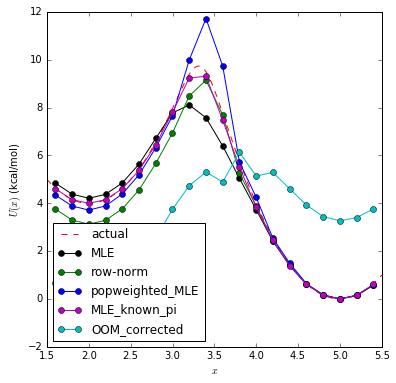

***** TRAJLENGTH 100 *****
-- trial 0 nshoot 15 --
adaptive seeding of bin 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
implied_timescale_corrected 138.176978681
pi_corrected [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   5.18040477e-06
   2.49250673e-04   2.65985458e-03   2.53254107e-02   1.04192644e-01
   2.36446868e-01   2.96650512e-01   2.28810578e-01   1.05659701e-01]
delF_corrected inf kcal/mol.
f_corrected [        inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf  6.52943438
  4.22078313  2.80971283  1.46660489  0.62360266  0.13519139  0.          0.1547575
  0.61526937]
implied_timescale_OOM 158.065256379 (rank M=3)
implied_timescale_MLE 1521845.67673 steps. delta_F 3.31584767141 kcal/mol.
implied_timescale_known_pi 9651376.32917 steps. delta_F_known_pi 3.

/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:236: RuntimeWarning: divide by zero encountered in double_scalars
/Users/vv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:240: RuntimeWarning: divide by zero encountered in double_scalars


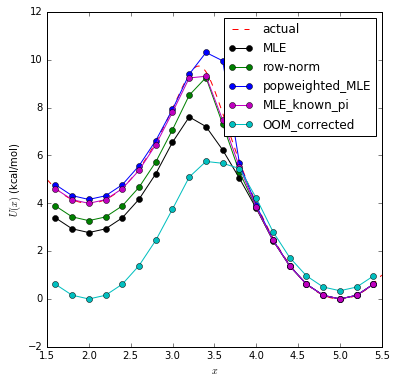

***** TRAJLENGTH 1000 *****
-- trial 0 nshoot 15 --
adaptive seeding of bin 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
implied_timescale_corrected 149.608747409
pi_corrected [  1.06307093e-01   2.31035158e-01   2.98116167e-01   2.27376557e-01
   1.04746144e-01   2.79572870e-02   4.17361172e-03   2.85718229e-04
   2.26502680e-06   2.16026629e-11   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
delF_corrected -inf kcal/mol.
f_corrected [  0.61456613   0.15192835   0.           0.16144195   0.62338232
   1.41061599   2.54414607   4.14233851   7.02544054  13.91536776
          inf          inf          inf          inf          inf
          inf          inf          inf          inf          inf]
implied_timescale_OOM 165.779465139 (rank M=4)
implied_timescale_MLE 3062855.77489 steps. delta_F 1.43875195791 kcal/mol.
implied_timescale_known_pi 4068580.05931 ste

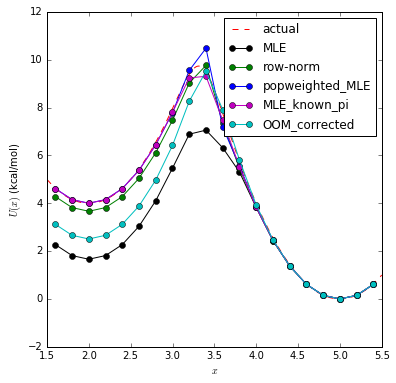

In [31]:
# Let's test the estimator

### Trajectory ANALYSIS! ####

import os, sys
from BinManager import *
from estimators import *


nbins = 20
bins = BinManager(nbins=nbins)


VERBOSE = False 

# from the implied_timescales.README
if (1):
    ntrials = 20
    nreplicas = [15, 25, 40, 75, 100, 150, 200, 300, 500, 750, 1000] # [5, 10, 15, 20, 25, 30]  
    trajlengths = [10, 100, 1000]  #, 1000]
else:
    ntrials = 10
    nreplicas = [100]  #5, 10, 15, 20, 25, 30, 40, 50, 75, 100] # [150, 200, 300, 500, 750, 1000] #, ,  
    trajlengths = [1000] #, 40]  # 100, 400, 1000]   #1000]  # [2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 75, 100, 120, 150, 200, 300]

resultsheader = '# shape (ntrials, len(nreplicas), len(trajlengths)): ntrials = %d, nreplicas = %s, trajlengths = %s\n'%(ntrials, repr(nreplicas), repr(trajlengths))
print 'resultsheader', resultsheader


# arrays to store the implied timescale results
implied_timescales =          np.ones( (ntrials, len(nreplicas), len(trajlengths)) )
implied_timescales_weighted = np.ones( (ntrials, len(nreplicas), len(trajlengths)) )
implied_timescales_known_pi = np.ones( (ntrials, len(nreplicas), len(trajlengths)) )
implied_timescales_rownorm  = np.ones( (ntrials, len(nreplicas), len(trajlengths)) )
implied_timescales_corrected = np.ones( (ntrials, len(nreplicas), len(trajlengths)) )
implied_timescales_OOM       = np.ones( (ntrials, len(nreplicas), len(trajlengths)) )
OOM_rankM_values             = np.ones( (ntrials, len(nreplicas), len(trajlengths)) )

# arrays to store the delta_f results (i.e. the two state $\Delta F of the left basin)
delta_f =          np.ones( (ntrials, len(nreplicas), len(trajlengths)) )
delta_f_weighted = np.ones( (ntrials, len(nreplicas), len(trajlengths)) )
delta_f_known_pi = np.ones( (ntrials, len(nreplicas), len(trajlengths)) )
delta_f_rownorm  = np.ones( (ntrials, len(nreplicas), len(trajlengths)) )
delta_f_corrected  = np.ones( (ntrials, len(nreplicas), len(trajlengths)) )


# For population reweighting, use the exact population of the bin centers
pi2 = np.exp(-U(bins.centers)/0.596)
pi2 = pi2/pi2.sum()

for itrajlength in range(len(trajlengths)):  #500, 1000, 2500, 5000]:  # in units of lagtime

    trajlength = trajlengths[itrajlength]
    
    for irep in range(len(nreplicas)):
        
        nshoot = nreplicas[irep] # number of trajectories to shoot from each state
        print '***** TRAJLENGTH', trajlength, '*****'
        
        for trial in range(ntrials):

            print '-- trial', trial, 'nshoot', nshoot, '--'
            lagtime = 100
            total_steps = trajlength*lagtime

            trajdata = []
            trajweights = []
            print 'adaptive seeding of bin', 

            for bin_index in range(nbins):

                print bin_index,
                
                # we will subsample nshoot trajectories from the 1000 seeds we have on file
                shoot_indices = np.random.choice(range(1000), size=nshoot, replace=True)
                for s in shoot_indices:
                    
                    # read in the trajectory
                    infile = 'results/trajectories/bin%d/trajlength1000_seed%d.txt'%(bin_index, s)
                    trajdata.append( np.loadtxt(infile)[0:trajlength,1])
                    trajweights.append( pi2[bin_index])

            print # newline for print bins
            
            # next we assign to bins
            dtrajs = []
            for traj in trajdata:
                dtrajs.append( bins.bin_index(traj) )
            #print 'dtrajs =', dtrajs
            
            # convert assigns to counts
            counts = np.zeros( (bins.nbins, bins.nbins) )
            weighted_counts = np.zeros( (bins.nbins, bins.nbins) )
            for a in range(len(dtrajs)):
                assignment = dtrajs[a]
                for j in range(len(assignment)-1):
                    counts[assignment[j],assignment[j+1]] += 1
                    weighted_counts[assignment[j],assignment[j+1]] += trajweights[a]


            
            ################################## OOM stuff ########################
            
            #### Corrected MSM estimator
            tau = 1  # lagtime in frames
            oom = OOMReweightedMSM(lag=tau, reversible=True, count_mode='sliding',
                                  sparse=False, connectivity='largest', dt_traj='%d step'%lagtime,
                                  nbs=10000, rank_Ct='bootstrap_counts', tol_rank=10.0,
                                  score_method='VAMP2', score_k=10, mincount_connectivity='1/n')
        
            try:
                oom.estimate(dtrajs)
                
                ### Corrected (via OOM) timescale
                implied_timescale_corrected = oom.timescales()[0]
                print 'implied_timescale_corrected', implied_timescale_corrected
                implied_timescales_corrected[trial, irep, itrajlength] = implied_timescale_corrected

                # Corrected stationary_distribution / free energies
                #### make sure to expand if any states are trimmed!
                pi_corrected = np.zeros(nbins)
                pi_corrected[oom.active_set] = oom.stationary_distribution
                print 'pi_corrected', pi_corrected
                if VERBOSE:
                    print 'Method 1: oom.stationary_distribution', oom.stationary_distribution
                p_left = pi_corrected[0:nbins/2].sum()
                delF_corrected = -0.596*np.log(p_left/(1.-p_left))
                print 'delF_corrected', delF_corrected, 'kcal/mol.'        
                f_corrected = -0.596*np.log(pi_corrected)  # free energies in kcal/mol
                f_corrected = f_corrected - f_corrected.min() # make lowest free energy value 0
                print 'f_corrected', f_corrected

                if (0):
                    Tt_Eq, lcc_new = compute_corrected_tProb(oom)
                    from pyemma.msm import markov_model
                    msm_rev = markov_model(Tt_Eq)
                    print 'Method 2: msm_rev.stationary_distribution', msm_rev.stationary_distribution
                    pi_corrected2 = np.zeros(nbins)
                    pi_corrected2[oom.active_set] = msm_rev.stationary_distribution
                    p_left2 = pi_corrected2[0:nbins/2].sum()
                    delF_corrected2 = -0.596*np.log(p_left/(1.-p_left))
                    print 'delta_F_OOM_2', delF_corrected2, 'kcal/mol.'     
                    #delta_f_corrected[trial, irep, itrajlength] = delF_corrected2


                ### OOM timescales
                M = oom.OOM_rank 
                if len(oom.timescales_OOM) > 0:
                    implied_timescale_OOM = oom.timescales_OOM[0]*lagtime
                    print 'implied_timescale_OOM', implied_timescale_OOM, '(rank M=%d)'%M
                else:
                    implied_timescale_OOM = 0.0  # None won't work here; need to store in formatted array as numbers
                    print 'implied_timescale_OOM', '[no data]', '(rank M=%d)'%M
                implied_timescales_OOM[trial, irep, itrajlength] = implied_timescale_OOM
                OOM_rankM_values[trial, irep, itrajlength] = M
            
            except:
                implied_timescale_corrected = 0.0
                implied_timescale_OOM = 0.0
                M = 0
                pi_corrected = np.zeros(nbins)
                p_left = pi_corrected[0:nbins/2].sum()
                delF_corrected = -0.596*np.log(p_left/(1.-p_left))
                f_corrected = -0.596*np.log(pi_corrected)  # free energies in kcal/mol
                f_corrected = f_corrected - f_corrected.min() # make lowest free energy value 0
                
            # OOM_tProb = OOM_corrected_tProb(dtrajs, tau)

            
            ################################## MLE estimator stuff ########################
            
            # get MLE tProb reversible and equilibrium pops
            tProb_MLE = MLE_tProb_reversible(counts)
            pi_MLE = get_stationary_pops(tProb_MLE)
            f_MLE = -0.596*np.log(pi_MLE)  # free energies in kcal/mol
            f_MLE = f_MLE - f_MLE.min() # make lowest free energy value 0
            evals, evecs = get_evals_evecs(tProb_MLE)
            tau_MLE = max(1.,-lagtime/np.log(evals[1]))
            implied_timescales[trial,irep,itrajlength] = tau_MLE
            print 'implied_timescale_MLE', implied_timescales[trial,irep,itrajlength], 'steps.',
            p_left = pi_MLE[0:nbins/2].sum()
            delF_MLE = -0.596*np.log(p_left/(1.-p_left))
            delta_f[trial,irep,itrajlength] = delF_MLE # \Delta F in kcal/mol
            print 'delta_F', delta_f[trial,irep,itrajlength], 'kcal/mol.'

            # get MLE tProb known_pi 
            # known pi estimator
            fine_grain = 1000
            nbins_fine = fine_grain*nbins
            bins_fine = BinManager(nbins=nbins_fine)
            pi_fine = np.exp(-U(bins_fine.centers)/0.596)
            pi = []
            for i in range(nbins):
                pi.append(pi_fine[i*fine_grain:(i+1)*fine_grain].sum())
            pi = np.array(pi)
            pi = pi/pi.sum()
            tProb_known_pi = MLE_tProb_known_pi(counts, pi)
            pi_known_pi = get_stationary_pops(tProb_known_pi)
            f_known_pi = -0.596*np.log(pi)  # free energies in kcal/mol
            f_known_pi = f_known_pi - f_known_pi.min() # make lowest free energy value 0
            evals, evecs = get_evals_evecs(tProb_known_pi)
            #print 'evals, evecs', evals, evecs
            tau_known_pi = max(1.,-lagtime/np.log(evals[1]))
            implied_timescales_known_pi[trial,irep,itrajlength] = tau_known_pi
            print 'implied_timescale_known_pi', implied_timescales_known_pi[trial,irep,itrajlength], 'steps.',
            p_left = pi[0:nbins/2].sum()
            delF_known_pi = -0.596*np.log(p_left/(1.-p_left))
            delta_f_known_pi[trial,irep,itrajlength] = delF_known_pi  # \Delta F in kcal/mol
            print 'delta_F_known_pi', delta_f_known_pi[trial,irep,itrajlength], 'kcal/mol.'

                 
            # get weighted MLE tProb and equilibrium pops
            weighted_tProb_MLE = MLE_tProb_reversible(weighted_counts)
            pi_weighted_MLE = get_stationary_pops(weighted_tProb_MLE)
            f_weighted_MLE = -0.596*np.log(pi_weighted_MLE)  # free energies in kcal/mol
            f_weighted_MLE = f_weighted_MLE - f_weighted_MLE.min() # make lowest free energy value 0
            ## get the implied times
            evals, evecs = get_evals_evecs(weighted_tProb_MLE)
            tau_weighted_MLE = max(1.,-lagtime/np.log(evals[1]))
            implied_timescales_weighted[trial,irep,itrajlength] = tau_weighted_MLE
            print 'implied_timescale_weighted_MLE', implied_timescales_weighted[trial,irep,itrajlength], 'steps.',
            p_left = pi_weighted_MLE[0:nbins/2].sum()
            delF_weighted_MLE = -0.596*np.log(p_left/(1.-p_left)) 
            delta_f_weighted[trial,irep,itrajlength] = delF_weighted_MLE # \Delta F in kcal/mol
            print 'delta_f_weighted', delta_f_weighted[trial,irep,itrajlength], 'kcal/mol.'


            # get row-normalized tProb and equilibrium pops
            tProb_rownorm = rownormalized_tProb(counts)
            pi_rownorm = get_stationary_pops(tProb_rownorm)
            print 'pi_rownorm', pi_rownorm
            f_rownorm = -0.596*np.log(pi_rownorm)  # free energies in kcal/mol
            f_rownorm = f_rownorm - f_rownorm.min() # make lowest free energy value 0
            evals, evecs = get_evals_evecs(tProb_rownorm)
            #print 'evals, evecs', evals, evecs
            tau_rownorm = max(1.,-lagtime/np.log(evals[1]))
            implied_timescales_rownorm[trial,irep,itrajlength]  = tau_rownorm
            print 'implied_timescale_rownorm', implied_timescales_rownorm[trial,irep,itrajlength] , 'steps.',
            p_left = pi_rownorm[0:nbins/2].sum()
            delF_rownorm = -0.596*np.log(p_left/(1.-p_left)) 
            delta_f_rownorm[trial,irep,itrajlength] = delF_rownorm # \Delta F in kcal/mol
            print 'delta_f_rownorm', delta_f_rownorm[trial,irep,itrajlength], 'kcal/mol.'
        
        
            ######################################
            ### save the results of this trial ###
            outdir = 'results-oct2018/seeding_tests/trajlength%d/nseeds%d'%(trajlength, nshoot)
            if not os.path.exists(outdir):
                os.mkdir(outdir)
            
            # Slowest implied timescale
            timescales_outfile = os.path.join(outdir,'trial%d_timescales.txt'%trial)
            header = 'tau_MLE\ttau_MLE_known_pi\ttau_weighted_MLE\ttau_rownorm\ttau_corr\ttau_OOM\tOOM_rank'
            # print np.array([ tau_MLE, tau_known_pi, tau_weighted_MLE, tau_rownorm,
            #                             implied_timescale_corrected, implied_timescale_OOM, M])
            outdata = np.real( np.array([ tau_MLE, tau_known_pi, tau_weighted_MLE, tau_rownorm,
                                         implied_timescale_corrected, implied_timescale_OOM, M]) )
            np.savetxt(timescales_outfile, outdata, header=header)
            
            # PMF
            pmf_outfile = os.path.join(outdir,'trial%d_pmf.txt'%trial)
            header = 'pmf_MLE\tpmf_MLE_known_pi\tpmf_weighted_MLE\tpmf_rownorm\tpmf_corr'
            # print np.array([ f_MLE, f_known_pi, f_weighted_MLE, f_rownorm, f_corrected])
            outdata = np.real( np.array([ f_MLE, f_known_pi, f_weighted_MLE, f_rownorm, f_corrected]) )
            outdata = outdata.transpose()
            np.savetxt(pmf_outfile, outdata, header=header)
            
            # \Delta F
            delF_outfile = os.path.join(outdir,'trial%d_deltaF.txt'%trial)
            header = 'delF_MLE\tdelF_MLE_known_pi\tdelF_weighted_MLE\tdelF_rownorm\tdelF_corr (all in kcal/mol)'
            outdata = np.real( np.array([ delF_MLE, delF_known_pi, delF_weighted_MLE, delF_rownorm, delF_corrected]) )
            np.savetxt(delF_outfile, outdata, header=header)


    dx = 0.01
    xmin, xmax = 1.5, 5.5
    x_values = np.arange(xmin, xmax+dx, dx)

    plt.figure( figsize=(6,6))
    plt.plot(x_values,U(x_values), 'r--', label='actual')
    plt.plot(bins.centers, f_MLE, 'ko-', label='MLE')
    plt.plot(bins.centers, f_rownorm, 'go-', label='row-norm')
    plt.plot(bins.centers, f_weighted_MLE, 'bo-', label='popweighted_MLE')
    plt.plot(bins.centers, f_known_pi, 'mo-', label='MLE_known_pi')
    plt.plot(bins.centers, f_corrected, 'co-', label='OOM_corrected')


    plt.xlabel('$x$')
    plt.ylabel('$U(x)$ (kcal/mol)')
    plt.xlim(xmin, xmax)
    plt.legend(loc='best')
    plt.show()






mean_implied_timescales [[  6.08409211e+00   3.48571574e+00]
 [  1.22970357e+02   1.02381709e+02]
 [  6.77849994e+03   5.67494038e+04]
 [  1.08412500e+03   1.04754520e+05]
 [  7.99324956e+04   3.51468750e+05]]
mean_implied_timescales_weighted [[  4.36143215e+01   2.11520172e+03]
 [  6.95363238e+02   1.37192960e+06]
 [  6.00930433e+04   2.97257792e+06]
 [  1.99440480e+04   8.86262945e+08]
 [  2.15305563e+07   9.79069698e+07]]
mean_implied_timescales_known_pi [[  2.09745454e+08   3.15330938e+07]
 [  7.70009302e+07   8.03008305e+06]
 [  7.05658558e+06   5.66662448e+06]
 [  7.47996785e+06   5.34827131e+06]
 [  6.51279045e+06   6.00110157e+06]]
mean_implied_timescales_rownorm [[  5.41304815e+08   3.38382074e+07]
 [  9.28125611e+07   1.10497326e+11]
 [  3.73416267e+08   9.09577883e+07]
 [  4.16471916e+09   1.34074107e+06]
 [  8.21620816e+07   5.65387658e+06]]
std_implied_timescales [[  74.01908979   42.36576177]
 [ 366.42216355  553.07164478]
 [ 332.7904501   262.50003867]
 [ 566.76466467  1

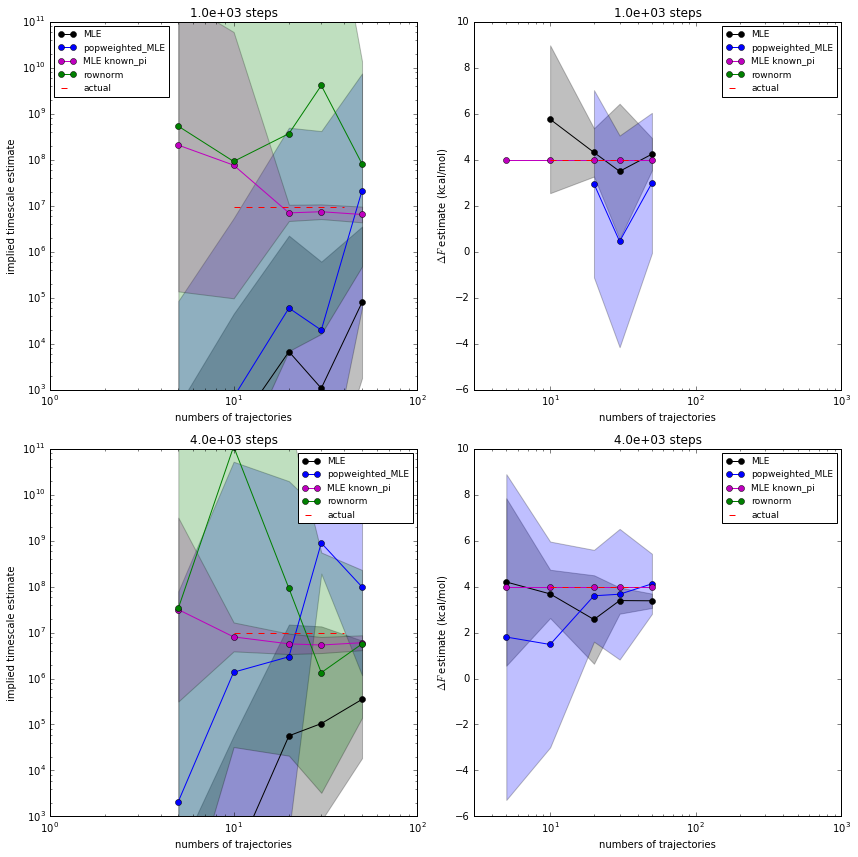

In [46]:
#### PLOT THE RESULTS

# From >> cat results/implied_timescales.README
# Data arrays have shape (ntrials, len(nreplicas), len(trajlengths))
# ntrials = 10
# nreplicas = [5, 10, 20, 50, 100, 200]
# trajlengths = [10, 100, 1000]

# Load in the data

implied_timescales = np.load('results/implied_timescales.results.npy')
implied_timescales_weighted = np.load('results/implied_timescales_weighted.results.npy')
implied_timescales_known_pi = np.load('results/implied_timescales_known_pi.results.npy')
implied_timescales_rownorm = np.load('results/implied_timescales_rownorm.results.npy')

delta_f = np.load('results/delta_f.results.npy')
delta_f_weighted = np.load('results/delta_f_weighted.results.npy')
delta_f_known_pi = np.load('results/delta_f_known_pi.results.npy')
delta_f_rownorm = np.load('results/delta_f_rownorm.results.npy')

# calculate means and standard deviations

mean_implied_timescales = np.exp(np.log(implied_timescales[:,:,:]).mean(axis=0))
mean_implied_timescales_weighted = np.exp(np.log(implied_timescales_weighted[:,:,:]).mean(axis=0))
mean_implied_timescales_known_pi = np.exp(np.log(implied_timescales_known_pi[:,:,:]).mean(axis=0))
mean_implied_timescales_rownorm = np.exp(np.log(implied_timescales_rownorm[:,:,:]).mean(axis=0))
# print 'mean_implied_timescales.shape', mean_implied_timescales.shape
print 'mean_implied_timescales', mean_implied_timescales
print 'mean_implied_timescales_weighted', mean_implied_timescales_weighted
print 'mean_implied_timescales_known_pi', mean_implied_timescales_known_pi
print 'mean_implied_timescales_rownorm', mean_implied_timescales_rownorm

std_implied_timescales = np.exp(np.log(implied_timescales[:,:,:]).std(axis=0))
std_implied_timescales_weighted = np.exp(np.log(implied_timescales_weighted[:,:,:]).std(axis=0))
std_implied_timescales_known_pi = np.exp(np.log(implied_timescales_known_pi[:,:,:]).std(axis=0))
std_implied_timescales_rownorm = np.exp(np.log(implied_timescales_rownorm[:,:,:]).std(axis=0))
print 'std_implied_timescales', std_implied_timescales
print 'std_implied_timescales_weighted', std_implied_timescales_weighted
print 'std_implied_timescales_known_pi', std_implied_timescales_known_pi
print 'std_implied_timescales_rownorm', std_implied_timescales_rownorm

upper_implied_timescales = np.exp(np.maximum(1., np.log(mean_implied_timescales) + np.log(std_implied_timescales)))
lower_implied_timescales = np.exp(np.maximum(1., np.log(mean_implied_timescales) - np.log(std_implied_timescales)))

upper_implied_timescales_weighted = np.exp(np.maximum(1., np.log(mean_implied_timescales_weighted) + np.log(std_implied_timescales_weighted)))
lower_implied_timescales_weighted = np.exp(np.maximum(1., np.log(mean_implied_timescales_weighted) - np.log(std_implied_timescales_weighted)))

upper_implied_timescales_known_pi = np.exp(np.maximum(1., np.log(mean_implied_timescales_known_pi) + np.log(std_implied_timescales_known_pi)))
lower_implied_timescales_known_pi = np.exp(np.maximum(1., np.log(mean_implied_timescales_known_pi) - np.log(std_implied_timescales_known_pi)))

upper_implied_timescales_rownorm = np.exp(np.maximum(1., np.log(mean_implied_timescales_rownorm) + np.log(std_implied_timescales_rownorm)))
lower_implied_timescales_rownorm = np.exp(np.maximum(1., np.log(mean_implied_timescales_rownorm) - np.log(std_implied_timescales_rownorm)))

plt.figure(figsize=(12,12))

for ntraj_index in range(len(trajlengths)):

    plt.subplot(len(trajlengths),2,2*ntraj_index+1)

    plt.plot(nreplicas, mean_implied_timescales[:,ntraj_index], 'ko-', label='MLE') 
    plt.fill_between(nreplicas,   lower_implied_timescales[:,ntraj_index], upper_implied_timescales[:,ntraj_index], facecolor='k', alpha=0.25)

    plt.plot(nreplicas, mean_implied_timescales_weighted[:,ntraj_index], 'bo-', label='popweighted_MLE') 
    plt.fill_between(nreplicas,   lower_implied_timescales_weighted[:,ntraj_index], upper_implied_timescales_weighted[:,ntraj_index], facecolor='b', alpha=0.25)

    plt.plot(nreplicas, mean_implied_timescales_known_pi[:,ntraj_index], 'mo-', label='MLE known_pi') 
    plt.fill_between(nreplicas,   lower_implied_timescales_known_pi[:,ntraj_index], upper_implied_timescales_known_pi[:,ntraj_index], facecolor='m', alpha=0.25)

    plt.plot(nreplicas, mean_implied_timescales_rownorm[:,ntraj_index], 'go-', label='rownorm') 
    plt.fill_between(nreplicas,   lower_implied_timescales_rownorm[:,ntraj_index], upper_implied_timescales_rownorm[:,ntraj_index], facecolor='g', alpha=0.25)

    #plt.plot(trajlengths, mean_implied_timescales_weighted, 'bo-', label='popweighted_MLE')
    #plt.plot(trajlengths, mean_implied_timescales_known_pi, 'mo-', label='MLE known_pi')
    #plt.plot(trajlengths, mean_implied_timescales_rownorm, 'go-', label='rownorm')
    plt.plot(trajlengths, [actual_timescale]*len(trajlengths), 'r--', label='actual')

    plt.xscale('log')
    #plt.xticks(trajlengths)
    plt.xlabel('numbers of trajectories')
    plt.yscale('log')
    #plt.ylim(-5,10)
    plt.ylabel('implied timescale estimate')
    plt.title('%2.1e steps'%(trajlengths[ntraj_index]*lagtime))
    plt.ylim(1e3,1e11)
    plt.legend(loc='best', fontsize=9)
    
    
mean_delta_f          = delta_f.mean(axis=0)
mean_delta_f_weighted = delta_f_weighted.mean(axis=0)
mean_delta_f_known_pi = delta_f_known_pi.mean(axis=0)
mean_delta_f_rownorm  = delta_f_rownorm.mean(axis=0)
print 'mean_delta_f_rownorm', mean_delta_f_rownorm

std_delta_f          = delta_f.std(axis=0)
std_delta_f_weighted = delta_f_weighted.std(axis=0)
std_delta_f_known_pi = delta_f_known_pi.std(axis=0)
std_delta_f_rownorm  = delta_f_rownorm.std(axis=0)
print 'std_delta_f_rownorm', std_delta_f_rownorm

lower_delta_f =          mean_delta_f - std_delta_f
lower_delta_f_weighted = mean_delta_f_weighted - std_delta_f_weighted
lower_delta_f_known_pi = mean_delta_f_known_pi - std_delta_f_known_pi
lower_delta_f_rownorm  = mean_delta_f_rownorm - std_delta_f_rownorm

upper_delta_f =          mean_delta_f + std_delta_f
upper_delta_f_weighted = mean_delta_f_weighted + std_delta_f_weighted
upper_delta_f_known_pi = mean_delta_f_known_pi + std_delta_f_known_pi
upper_delta_f_rownorm  = mean_delta_f_rownorm + std_delta_f_rownorm


for ntraj_index in range(len(trajlengths)):

    plt.subplot(len(trajlengths),2,2*ntraj_index+2)

    plt.plot(nreplicas, mean_delta_f[:,ntraj_index], 'ko-', label='MLE') 
    plt.fill_between(nreplicas,   lower_delta_f[:,ntraj_index], upper_delta_f[:,ntraj_index], facecolor='k', alpha=0.25)

    plt.plot(nreplicas, mean_delta_f_weighted[:,ntraj_index], 'bo-', label='popweighted_MLE') 
    plt.fill_between(nreplicas,   lower_delta_f_weighted[:,ntraj_index], upper_delta_f_weighted[:,ntraj_index], facecolor='b', alpha=0.25)

    plt.plot(nreplicas, mean_delta_f_known_pi[:,ntraj_index], 'mo-', label='MLE known_pi') 
    plt.fill_between(nreplicas,   lower_delta_f_known_pi[:,ntraj_index], upper_delta_f_known_pi[:,ntraj_index], facecolor='m', alpha=0.25)

    plt.plot(nreplicas, mean_delta_f_rownorm[:,ntraj_index], 'go-', label='rownorm') 
    plt.fill_between(nreplicas,   lower_delta_f_rownorm[:,ntraj_index], upper_delta_f_rownorm[:,ntraj_index], facecolor='g', alpha=0.25)

    plt.plot(trajlengths, [4.0]*len(trajlengths), 'r--', label='actual')

    plt.xscale('log')
    plt.xlim(3,1000)
    #plt.xticks(trajlengths)
    plt.xlabel('numbers of trajectories')
    #plt.yscale('log')
    plt.ylabel('$\Delta F$ estimate (kcal/mol)')

    #plt.ylim(-5,10)
    plt.title('%2.1e steps'%(trajlengths[ntraj_index]*lagtime))
    plt.legend(loc='best', fontsize=9)

plt.tight_layout()    
plt.show()





